# 📊 Clustering
> **Grouping the same kind of unleveled data**  
> Data points are **classified / groupified** in manner so that:  
> - **Intra-group similarities are high**  
> - **Inter-group similarities are low**  

---

# 🔹 K-Means Clustering
- **Numerical datapoints (1D, 2D, ...)** are given  
- **Determine number of clusters (k)**  
  - randomly *(not optimised)*  
  - or by **elbow method** *(optimised)*  
- **Choose an initial mean** for each cluster  
  - `kmeans++` rule is a **better approach**  
- **Find Euclidean distance** of each data point with the means of the cluster  
- **Insert the point** to the cluster to which the point is nearer  

# Target of the algorithm
- **Minimise the detortion index / inertia**
    - `ditortion index` = ***Squared sum of the distance of each data point with the k-mean in which cluster the data point is present***

### Normal dataset to perform clustering

In [62]:
data = [[2, 3], [5, 7], [8, 3], [3, 5], [7, 2], [6, 8], [1, 4], [4, 6], [9, 5], [5, 4]]
x = [p[0] for p in data]
y = [p[1] for p in data]
x, y
 

([2, 5, 8, 3, 7, 6, 1, 4, 9, 5], [3, 7, 3, 5, 2, 8, 4, 6, 5, 4])

In [63]:
import matplotlib.pyplot as plt

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_1260\4080648477.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([p[0] for p in data], [p[1] for p in data], c='green', cmap="plasma", s=50, marker="o", alpha= 0.5)


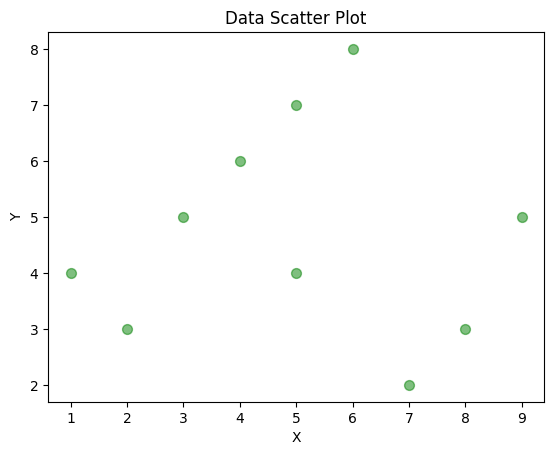

In [64]:
# Visualise the scatter plot
plt.scatter([p[0] for p in data], [p[1] for p in data], c='green', cmap="plasma", s=50, marker="o", alpha= 0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Scatter Plot")
plt.show()

### Implementation

In [65]:
from sklearn.cluster import KMeans

- Type 1: 
    - Using *random* initialise mean
    - Using *randomly defined k*

In [66]:
k_means_type_1 = KMeans(n_clusters=2, init='random', random_state=42)
result = k_means_type_1.fit(data)

In [67]:
result

,n_clusters,2
,init,'random'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


###  Analyse the result

In [ ]:
# final means of each cluster
result.cluster_centers_

array([[3.71428571, 5.28571429],
       [8.        , 3.33333333]])

In [69]:
# in which cluster the data point has been inserted
result.labels_

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [70]:
# distortion index / inertia for using k = 2
result.inertia_

45.52380952380953

In [71]:
# predict the correct cluster of a particular data point
result.predict([[4,5]])

array([0], dtype=int32)

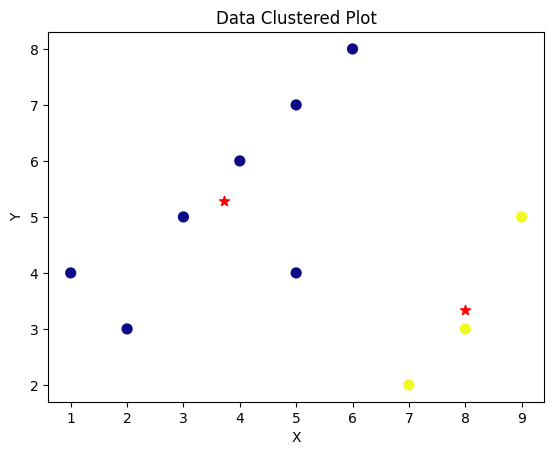

In [72]:
# Visualise the clustered plot
plt.scatter([p[0] for p in data], [p[1] for p in data], c=result.labels_, cmap="plasma", s=50, marker="o", alpha= 1)
plt.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1], c="red", marker="*", s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Clustered Plot")
plt.show()

- Type 2
    - Using initialise mean defined by *kmeans++* 
    - Using *randomly defined k*

In [73]:
k_means_type_2 = KMeans(n_clusters=2, init="k-means++", random_state=42)
result = k_means_type_2.fit(data)

In [74]:
# means of each cluster
result.cluster_centers_

array([[3.71428571, 5.28571429],
       [8.        , 3.33333333]])

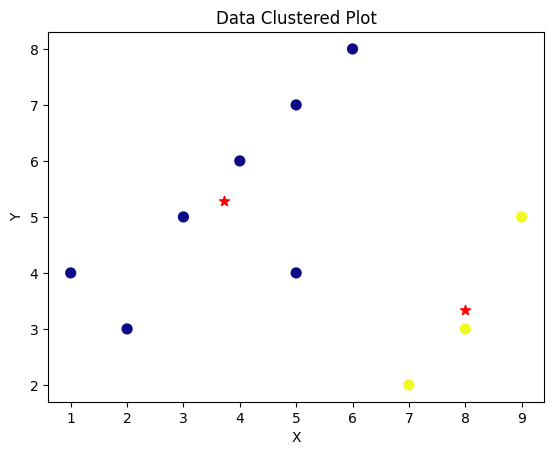

In [75]:
# Visualise the clustered plot
plt.scatter([p[0] for p in data], [p[1] for p in data], c=result.labels_, cmap="plasma", s=50, marker="o", alpha= 1)
plt.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1], c="red", marker="*", s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Clustered Plot")
plt.show()

- Type 3 (Better + Optimised)
    - Using initialise mean defined by ***kmeans++*** 
    - Using k defined by ***elbow-method***

In [76]:
import numpy as np

In [77]:
# possible number of clusters can be in 1 to 11
ks = np.arange(1,11)
ks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [78]:
# find the inertias for different ks
intertias = []
for k in ks :
    k_menas_temp = KMeans(n_clusters=k, init="k-means++", random_state=42)
    result = k_menas_temp.fit(data)
    intertias.append(result.inertia_)

intertias

[92.10000000000001,
 45.52380952380953,
 22.866666666666667,
 17.200000000000003,
 7.0,
 6.0,
 5.0,
 2.0,
 1.0,
 0.0]

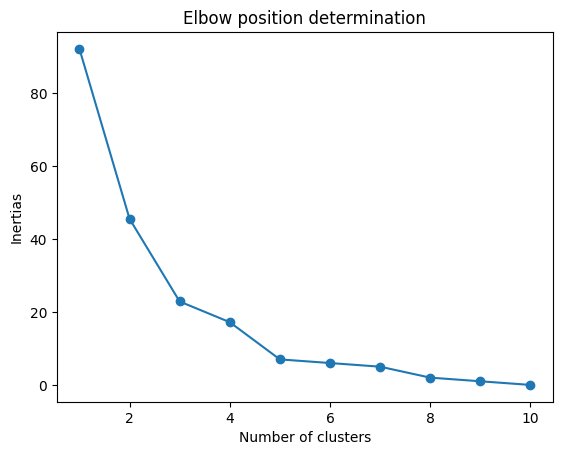

In [79]:
# visualise for elbow position
plt.plot(ks, intertias, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertias")
plt.title("Elbow position determination")
plt.show()

> *From the plot it's clear that the elbow position (after which the loss of the inertia becomes almost constant) is ***5*** (Best K for clustering the dataset)*

In [80]:
k_means_type_3 = KMeans(n_clusters=5, init="k-means++", random_state=42)
result = k_means_type_3.fit(data)

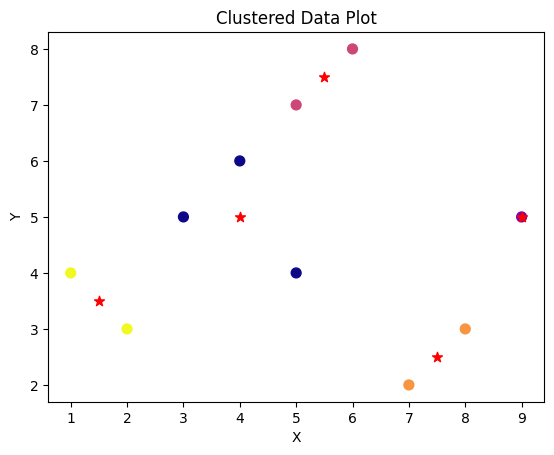

In [81]:
# Visualise the clustered plot
plt.scatter([p[0] for p in data], [p[1] for p in data], c=result.labels_, cmap="plasma", s=50, marker="o", alpha= 1)
plt.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1], c="red", marker="*", s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clustered Data Plot")
plt.show()

In [82]:
# in which cluster the data point has been inserted
result.labels_

array([4, 2, 3, 0, 3, 2, 4, 0, 1, 0], dtype=int32)

In [83]:
pred = result.predict([[10,15]])
print("Predicted cluster: ", pred[0])

Predicted cluster:  2


- Type 4 (To segregate clusters on defined genre)
    - Using a particular datapoint as initialise means
    - Using a particular k

In [ ]:
k_means_type_4 = KMeans(n_clusters=2, init=[data[2], data[3]], random_state=42)
result = k_means_type_4.fit(data)

In [85]:
result.cluster_centers_

array([[8.        , 3.33333333],
       [3.71428571, 5.28571429]])

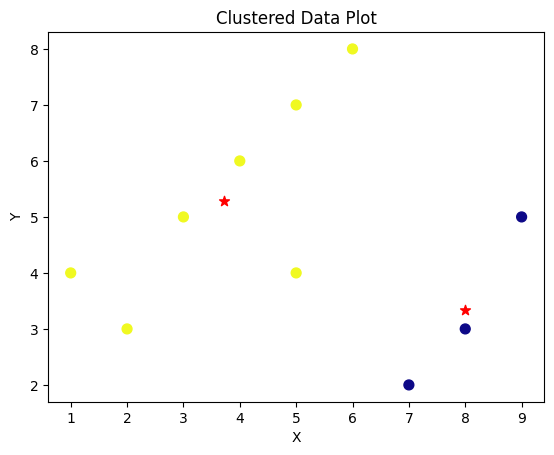

In [86]:
# Visualise the clustered plot
plt.scatter([p[0] for p in data], [p[1] for p in data], c=result.labels_, cmap="plasma", s=50, marker="o", alpha= 1)
plt.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1], c="red", marker="*", s=55)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clustered Data Plot")
plt.show()

## Data set is like dataframe

In [87]:
import pandas as pd

In [88]:
data_ = {
    "x": [2, 5, 8, 3, 7, 6, 1, 4, 9, 5],
    "y": [3, 7, 3, 5, 2, 8, 4, 6, 5, 4],
    "z": [7, 9, 4, 0, 5, 8, 5, 6, 8, 1]
}

data_df = pd.DataFrame(data_)
data_df

,x,y,z
0,2,3,7
1,5,7,9
2,8,3,4
3,3,5,0
4,7,2,5
5,6,8,8
6,1,4,5
7,4,6,6
8,9,5,8
9,5,4,1


C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_1260\868506528.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data_df["x"] , data_df["y"] , data_df["z"], c='green', cmap="plasma", s=50, marker="o", alpha= 0.5)


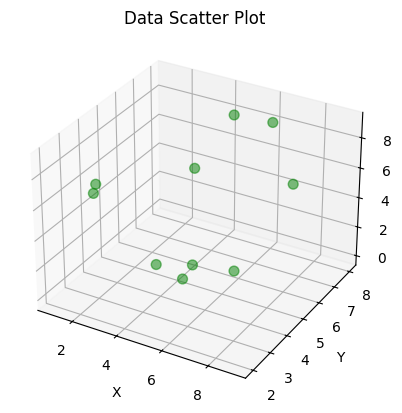

In [89]:
# Visualise the scatter plot

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(data_df["x"] , data_df["y"] , data_df["z"], c='green', cmap="plasma", s=50, marker="o", alpha= 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Data Scatter Plot")
plt.show()

In [90]:
result = k_means_type_3.fit(data_df)

In [91]:
result.labels_

array([4, 2, 3, 0, 3, 2, 4, 1, 2, 0], dtype=int32)

In [92]:
# Visualise the clustered plot
ax.scatter(data_df["x"], data_df["y"], data_df["z"], c=result.labels_, cmap="plasma", s=50, marker="o", alpha= 1)
ax.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1], result.cluster_centers_[:, 2], c="red", marker="*", s=55)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Clustered Data Plot")
plt.show()